**Group 63: Trading Desk Analysis of Exotic Options**

Object Oriented Programming Essentials to define a class applicable to each option with traits able to be inherited by each object

European up-and-in barrier call option on Wesfarmers Limited (WES). This option has a strike price of $80.00, an in-barrier level of $100.00, and will expire on 15 Sept 2027, with the valuation commencing on the 16th of May 2025.

In [1]:
import datetime
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib.lines import Line2D
import yfinance as yf
from openpyxl import load_workbook

**To Price the Barrier call option, the following steps must be undergone:**
1. Simulate many GBM Paths (potential movements of WES stock) - Monte Carlo simulation
2. Check for any paths that have breached the barrier over the duration
3. Calculate Payoffs where the barrier has not been breached (Max of asset price less the strike) 
4. Discount payoffs

/tmp/ipykernel_17926/2929205813.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  S0 = float(data["Close"].iloc[0])  # Ensure scalar


Risk-Free Rate (decimal): 0.040691012880562066
WES Up-and-In Barrier Call Option Price: $8.38


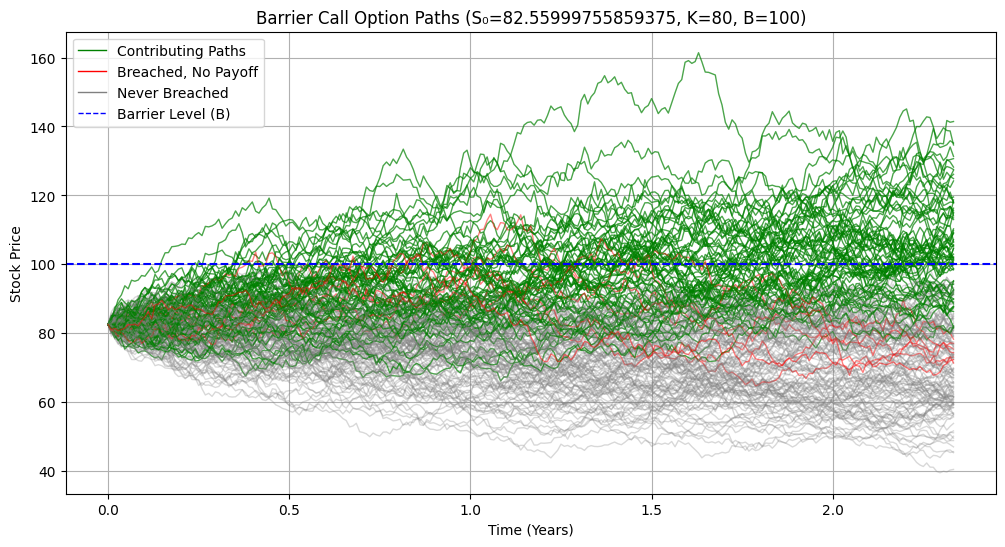

In [4]:
import yfinance as yf
from datetime import datetime
import pandas as pd
from instrument_classes import BarrierCall  

# Pulling close price as at 16 May 2025 from yfinance
ticker = "WES.AX"
valuation_date = datetime(2025, 5, 16)
expiry_date = datetime(2027, 9, 15)
target_date_str = valuation_date.strftime("%Y-%m-%d")
data = yf.download(ticker, start=target_date_str, end="2025-05-17", progress=False)
if data.empty:
    raise ValueError(f"No data available for {ticker} on {target_date_str}")
S0 = float(data["Close"].iloc[0])  # Ensure scalar

# Calculate time to maturity dynamically 
T = (expiry_date - valuation_date).days / 365.25  # Year fraction

# Pull volatility (sigma) from cell R12 in sheet "Worksheet"
vol_file = "Rates_Volatilities.xlsx"
from openpyxl import load_workbook

# Open the workbook and access the value from R12
wb = load_workbook(filename=vol_file, data_only=True)
ws = wb["WES"]
sigma = ws["R12"].value  # This returns the evaluated result (not the formula)

if sigma is None:
    raise ValueError("Volatility (sigma) in cell R12 returned None — please check if Excel formula has been calculated and saved.")

wb.close()

#Calculate Risk-free, the maturity of this option was 2.338 years so the 
#3yr risk-free rate was discounted accordingly to align with the maturity of this option
wb = load_workbook(filename=vol_file, data_only=True)
ws = wb["Risk Free"]
r = (ws["F21"].value)/100  # This returns the evaluated result (not the formula)

if r is None:
    raise ValueError("Risk-Free in cell F21 returned None — please check if Excel formula has been calculated and saved.")

wb.close()
print(f"Risk-Free Rate (decimal): {r}")

# Instantiate and price the option
wes_option = BarrierCall(
    S0=S0,
    K=80,
    T=T,
    r=(r/100),
    sigma=sigma,
    B=100,
    M=10000,
    N=252,
    random_seed=42
)

price = wes_option.price()
print(f"WES Up-and-In Barrier Call Option Price: ${price:.2f}")

# Visualize simulated paths
wes_option.visualize(max_paths=200)
